In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# データの特徴をつかむ

In [3]:
data = np.array([0, 1, 0, 0, 1])

#n_experiments = 100
#theta_real = 0.35
#data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)

data

array([0, 1, 0, 0, 1])

# モデルを決める

# 事後分布を求める

In [4]:
with pm.Model() as model:
    theta = pm.Beta('theta', alpha=1, beta=1)
    y = pm.Bernoulli('y', p=theta, observed=data)

    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 2792.68draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124329400>,
      dtype=object)

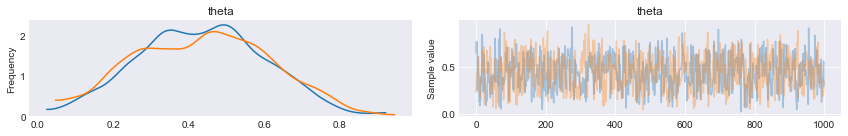

In [5]:
pm.traceplot(trace)

<Figure size 432x288 with 0 Axes>

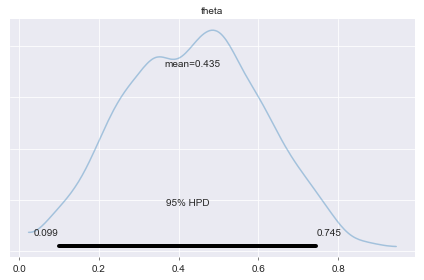

<Figure size 432x288 with 0 Axes>

In [6]:
pm.plot_posterior(trace, kde_plot=True)

plt.figure()

# 予測分布を求める

In [7]:
ppc = pm.sample_posterior_predictive(trace, samples=100, model=model)
ppc

100%|██████████| 100/100 [00:00<00:00, 2195.38it/s]


{'y': array([[0, 1, 1, 1, 1],
        [0, 0, 0, 1, 1],
        [1, 1, 0, 1, 1],
        [0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 1, 0, 1],
        [1, 0, 0, 1, 1],
        [1, 0, 1, 1, 0],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 1, 0],
        [1, 1, 0, 1, 1],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 1],
        [1, 1, 0, 0, 0],
        [0, 1, 0, 1, 1],
        [1, 0, 1, 0, 1],
        [1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [1, 1, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0,

(array([13., 30., 28., 15., 12.,  2.]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        ]),
 <a list of 6 Patch objects>)

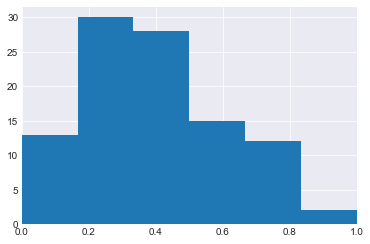

In [9]:
plt.xlim(0.0, 1, 0)

plt.hist([y.mean() for y in ppc['y']], bins=len(data)+1)